# Lesson 15 Activity: Data Wrangling

## Learning Objectives

This activity will help you to:

1. Merge and aggregate data from multiple sources
2. Apply groupby operations to summarize data
3. Calculate meaningful statistics from aggregated data
4. Visualize aggregated results

## Setup

Import the required libraries.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1: Merge Data and Calculate Monthly Sales

**Tasks**:

1. Merge `df_sales` and `df_dates` on the `transaction_id` column. Store the result in a dataframe called `df_transactions`.

2. Extract the month from the `sale_date` column and add it as a new column called `month` in `df_transactions`.

3. Calculate the total sales per month using groupby and sum. Store the result in a dataframe called `monthly_sales`.

4. Create a bar chart showing the total sales for each month. Include appropriate labels and title.

**Hints**:

- To merge two dataframes, use `pd.merge()` or the `.merge()` method. You can specify the column to join on with the `on` parameter.
  - Example: `df_merged = pd.merge(df1, df2, on='key_column')`
  - Or: `df_merged = df1.merge(df2, on='key_column')`

- To extract the month from a datetime column, use the `.dt.month` accessor.
  - Example: `df['month'] = df['date_column'].dt.month`

- To group by a column and calculate the sum, use `.groupby()` followed by `.sum()`.
  - Example: `grouped_df = df.groupby('group_column')['value_column'].sum()`
  - You can also use `.reset_index()` to convert the result back to a regular dataframe.

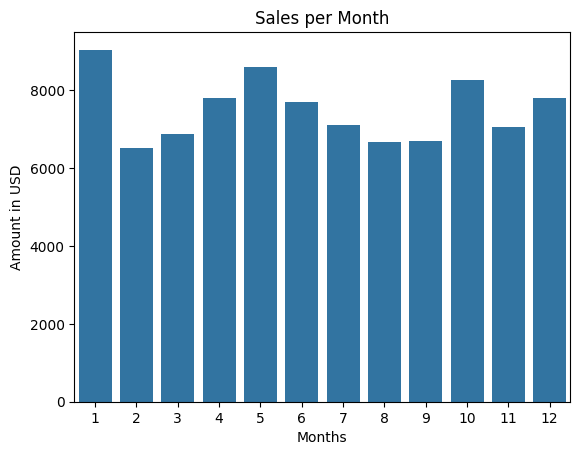

In [41]:
#extract our two dataframes from csv
df_sale_amounts = pd.read_csv('sale_amounts.csv')
df_sale_dates = pd.read_csv('sales_by_date.csv')

#Merge both df to create a new dataset
df_transactions = df_sale_amounts.merge(df_sale_dates, on='transaction_id')

#Create month column by extracting the month from the date column
df_transactions['month'] = pd.to_datetime(df_transactions['sale_date']).dt.month

#Calc sales per month
monthly_sales = df_transactions.groupby(df_transactions['month'])['sale_amount'].sum().reset_index()

#Bar chart of monthly sales
plt.title('Sales per Month')
sns.barplot(x='month', y='sale_amount', data=monthly_sales)
plt.ylabel('Amount in USD')
plt.xlabel('Months')

plt.show()


## Exercise 2: Analyze Missing Data Patterns

Load the California Housing dataset with missing values and investigate whether the pattern of missing data in the `HouseAge` feature is related to the `Population` feature.

**Background**: 
Sometimes data is not missing completely at random. In real-world scenarios, certain values might be more likely to be missing based on other features in the dataset. This is called Missing Not At Random (MNAR). Understanding these patterns is important for choosing appropriate imputation strategies.

**Tasks**:

1. Load the dataset from `salted_housing_data.csv` and examine the first few rows.

2. Create a new boolean column called `HouseAge_Missing` that indicates whether `HouseAge` is missing (True) or not (False).

3. Use `pd.qcut()` to bin the `Population` feature into 4 quartiles. Store the result in a new column called `Population_Quartile`. Use labels like `['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)']`.

4. Calculate the percentage of missing `HouseAge` values for each population quartile. Use `groupby()` to group by `Population_Quartile` and calculate:
   - The count of missing values (sum of `HouseAge_Missing`)
   - The total count in each quartile
   - The percentage missing

5. Create a bar chart showing the percentage of missing `HouseAge` values by population quartile. Add value labels on top of each bar.

6. Based on your analysis, answer: Is `HouseAge` more likely to be missing in certain population groups? What does this suggest about the missing data mechanism?

**Hints**:

- To check for missing values, use `.isnull()` or `.isna()`.
  - Example: `df['HouseAge_Missing'] = df['HouseAge'].isnull()`

- To create quartile bins, use `pd.qcut()` with `q=4`.
  - Example: `df['quartile'] = pd.qcut(df['column'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])`

- To calculate percentage missing by group:
  - Group by the quartile column
  - Use `.agg()` with multiple functions: `{'HouseAge_Missing': ['sum', 'count']}`
  - Calculate percentage: `(sum / count) * 100`

- Missing data mechanisms:
  - **MCAR** (Missing Completely At Random): No relationship between missingness and any variable
  - **MAR** (Missing At Random): Missingness depends on observed variables
  - **MNAR** (Missing Not At Random): Missingness depends on the missing value itself or unobserved variables

HouseAge
52.0    1261
36.0     859
35.0     819
16.0     762
17.0     694
34.0     681
33.0     610
26.0     608
18.0     563
32.0     561
25.0     560
37.0     532
15.0     504
19.0     499
27.0     484
30.0     470
24.0     469
28.0     466
20.0     459
29.0     458
31.0     454
23.0     445
21.0     441
14.0     408
22.0     397
38.0     390
39.0     367
42.0     363
44.0     354
43.0     349
13.0     301
40.0     301
45.0     293
41.0     292
10.0     261
11.0     252
5.0      243
46.0     241
12.0     237
9.0      204
8.0      204
47.0     198
4.0      189
7.0      175
48.0     173
6.0      159
50.0     136
49.0     133
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       19094 non-null  float64
 1   HouseAge     20451 non-null  float64
 2   AveRooms

C:\Users\gahhh\AppData\Local\Temp\ipykernel_19428\34532285.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_housing_pop_quarter = df_salted_housing.groupby(df_salted_housing['Population_Quartile']).agg({'HouseAge_Missing': ['sum', 'count']})


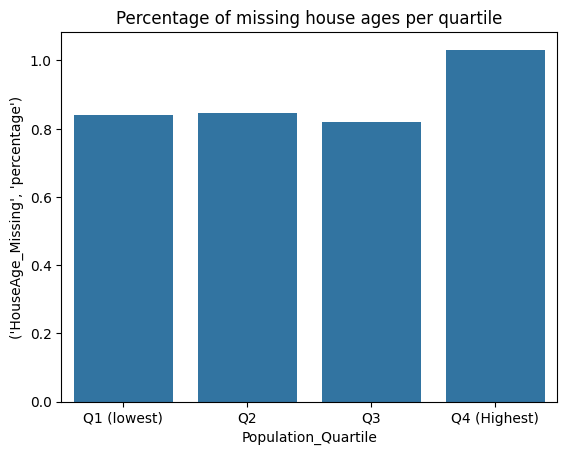

In [116]:
#Extract dataframe info from csv
df_cali_housing = pd.read_csv('california_housing.csv')
df_salted_housing = pd.read_csv('salted_housing_data.csv')

#create new column HouseAge_Missing for null values on house age
print(df_salted_housing['HouseAge'].value_counts())     #Checking for weird values
print(df_salted_housing.info())
df_salted_housing['HouseAge_Missing'] = df_salted_housing['HouseAge'].isnull()

#Create new column Population_Quartile for binning the population feature
df_salted_housing['Population_Quartile'] = pd.qcut(df_salted_housing['Population'], q=4, labels=['Q1 (lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])

#calculate the percentage of missing house ages for each quartile 
missing_housing_pop_quarter = df_salted_housing.groupby(df_salted_housing['Population_Quartile']).agg({'HouseAge_Missing': ['sum', 'count']})
missing_housing_pop_quarter.loc[:, ('HouseAge_Missing','percentage')]  = (missing_housing_pop_quarter['HouseAge_Missing']['sum'] / missing_housing_pop_quarter['HouseAge_Missing']['count']) * 100
print(missing_housing_pop_quarter)

#create bar chart for missing house ages
plt.title('Percentage of missing house ages per quartile')
sns.barplot(x='Population_Quartile', y=('HouseAge_Missing','percentage'), data=missing_housing_pop_quarter)

plt.show()


## Exercise 3: Apply Imputation to Missing Data

Now that you've analyzed the missing data pattern, select and apply an appropriate imputation method to fill in the missing `HouseAge` values.

**Background**:
Based on your findings from Exercise 2, you discovered that `HouseAge` is more likely to be missing in areas with lower population (MNAR pattern). This information should guide your choice of imputation method. Advanced methods like KNN or Iterative Imputation can leverage relationships between features, which is particularly useful when data is not missing completely at random.

**Tasks**:

1. Choose an imputation method. Consider:
   - Simple methods: Mean or Median imputation
   - Advanced methods: KNN Imputation or Iterative Imputation
   - Justify your choice based on the missing data pattern you discovered
2. Apply your chosen imputation method to fill the missing `HouseAge` values. Store the result in a new column called `HouseAge_imputed`.

3. Compare the distribution of the original `HouseAge` (non-missing values only) with the imputed values:
   - Create a histogram showing both distributions
   - Calculate summary statistics (mean, median, std) for both

4. Evaluate your imputation:
   - Does the imputed distribution look reasonable compared to the original?
   - Are there any obvious problems or artifacts introduced by the imputation?
   - Would a different method have been better? Why or why not?

HouseAge_imputed    28.648953
dtype: float64
HouseAge_imputed    29.0
dtype: float64
HouseAge_imputed    12.553989
dtype: float64


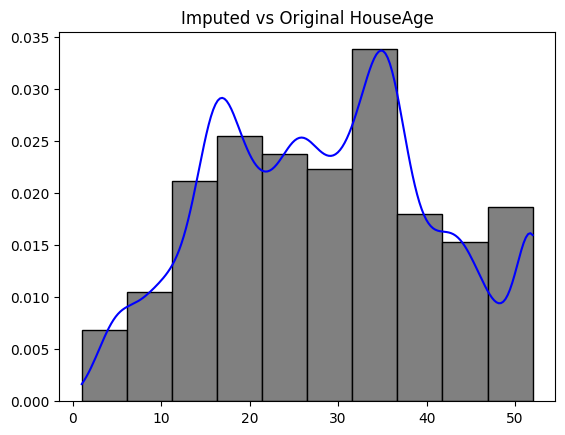

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19094.000000,20451.000000,19141.000000,17282.000000,17075.000000,17596.000000,17938.000000,16631.000000,19553.000000
mean,3.869517,28.638551,5.426283,1.096446,1425.504890,3.093417,35.640733,-119.574790,2.070947
std,1.906203,12.590877,2.484484,0.459792,1137.027186,11.239466,2.138558,2.002598,1.154240
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.300000,0.149990
25%,2.560475,18.000000,4.442100,1.005799,788.000000,2.433650,33.930000,-121.800000,1.201000
50%,3.529900,29.000000,5.226872,1.048676,1166.000000,2.819087,34.260000,-118.510000,1.800000
75%,4.744225,37.000000,6.049080,1.099046,1728.000000,3.286746,37.720000,-118.010000,2.647000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.470000,5.000010


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from scipy import stats

#Need fresh instance, it cant convert Quartile we made
df_salted_housing = pd.read_csv('salted_housing_data.csv')

knn_imputer = KNNImputer(n_neighbors=5)
df_knn = knn_imputer.fit_transform(df_salted_housing)

# Extract the feature of interest
df_knn = pd.DataFrame(
    df_knn[:, df_salted_housing.columns.get_loc('HouseAge')],
    columns=['HouseAge_imputed'],
    index=df_salted_housing.index
)
df_knn

print(df_knn.mean())
print(df_knn.median())
print(df_knn.std())

#graph the imputed vs the original
plt.title('Imputed vs Original HouseAge')
plt.hist(df_salted_housing['HouseAge'], density=True, color='gray', edgecolor='black')

kde_original = stats.gaussian_kde(df_salted_housing['HouseAge'].dropna())
x_range = np.linspace(df_salted_housing['HouseAge'].min(), df_salted_housing['HouseAge'].max(), 200)
kde_values = kde_original(x_range)
plt.plot(x_range, kde_values, color='blue', label='Original Distribution')


plt.show()
df_salted_housing.describe()

I chose KNN because we noticed higher populations had more missing housing ages, so getting the features nearby could give a good indication of the houses age if they are of a similar time.   